***The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.***

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).


## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>

In [16]:
#first instal xlrd module
!pip install xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['ggplot'])
df = pd.read_excel('Canada.xlsx', sheet_name = 'Canada by Citizenship', skiprows = range(20), skipfooter = 2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [28]:
#Let's drop Type, coverage, area, reg, dev,
df = df.drop(['AREA', 'Type', 'Coverage', 'REG', 'DEV'], axis = 1)

#Now to rename a few columns
df.rename({'OdName': 'Country of Origin', 'AreaName': 'Continent', 'RegName': 'Region'}, axis = 1, inplace = True)

#to make the country of origin the index
df.set_index('Country of Origin', inplace = True )

#To make a few more changes
df['Total'] = df.sum(axis  = 1)

#to make all column labels of type string
df.columns = list(map(str, df.columns))

#To make a range of type string for the years
years = list(map(str, range(1980, 2014)))


In [3]:
#checking the basic info about the dataframe
df.info

<bound method DataFrame.info of                   Continent              Region             DevName  1980  \
Country of Origin                                                           
Afghanistan            Asia       Southern Asia  Developing regions    16   
Albania              Europe     Southern Europe   Developed regions     1   
Algeria              Africa     Northern Africa  Developing regions    80   
American Samoa      Oceania           Polynesia  Developing regions     0   
Andorra              Europe     Southern Europe   Developed regions     0   
...                     ...                 ...                 ...   ...   
Viet Nam               Asia  South-Eastern Asia  Developing regions  1191   
Western Sahara       Africa     Northern Africa  Developing regions     0   
Yemen                  Asia        Western Asia  Developing regions     1   
Zambia               Africa      Eastern Africa  Developing regions    11   
Zimbabwe             Africa      Eastern Afr

In [4]:
df.dtypes

Continent    object
Region       object
DevName      object
1980          int64
1981          int64
1982          int64
1983          int64
1984          int64
1985          int64
1986          int64
1987          int64
1988          int64
1989          int64
1990          int64
1991          int64
1992          int64
1993          int64
1994          int64
1995          int64
1996          int64
1997          int64
1998          int64
1999          int64
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
Total         int64
dtype: object

In [5]:
#To check for missing values
df.isna().sum()

Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

There are 195 rows and 43 columns. Below is an excerpt from the United Nations Documentation describing the data set:

Depending on the reporting country and year, a zero in a given cell may indicate that the number was either zero, not available or not applicable.

1. Entries under “Type” indicate whether the data presented refer to immigrants or emigrants. 
2. Entries under “Coverage” indicate whether the data refer to foreigners, to citizens or to both groups combined.
3. Entries under “OdName” indicate the name of the country of origin for immigrants or the name of the country of destination for emigrants. 
4. Entries under “AreaName” indicate the major area to which the country belongs. The numerical codes listed under “AREA” are based on the standard (“M49”) codes used by the United Nations Secretariat, which follow the ISO 3166 standard of the International Organization for Standardization (ISO). 
5. Entries under “RegName” indicate the region to which the country belongs. The numerical codes listed under “REG” follow the aforementioned ISO standard. 
6. Entries under “DevName” indicate the development group to which the country belongs. The numerical codes listed under “DEV” follow the standard M49 codes used by the United Nations Secretariat. 

In [6]:
df.columns.values

array(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', 'Total'],
      dtype=object)

In [7]:
#To see the new dataframe
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country of Origin,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [8]:
df.Total

Country of Origin
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Name: Total, Length: 195, dtype: int64

In [9]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country of Origin,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [10]:
#First to groupby continent, 
df_continent = df.groupby('Continent', axis = 0).sum()
df_continent.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


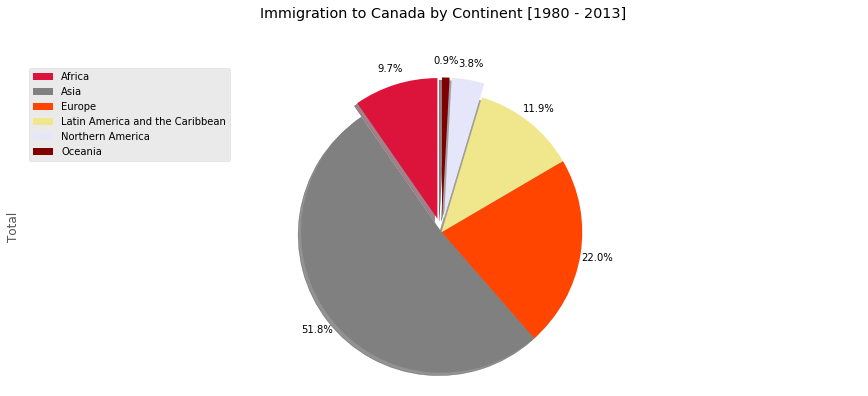

In [17]:
colors_list = ['crimson', 'grey', 'orangered', 'khaki', 'lavender', 'maroon']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continent['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continent.index, loc='upper left') 

plt.show()

The pie chart tells us that more than half of the immigrants who migrated into Canada from 1980  to 2013 are of Asian descent. The second largest being Europe(not surprised) and then Africa. Now i am a Nigerian and i would like to explore the data concerning Africa, specifically Nigeria.

Now for a visual that best explains the distribution of the continental dataset.

In [18]:
df_continent.index.values

array(['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
       'Northern America', 'Oceania'], dtype=object)

The first four continents according to the pie chart distribution is Asia(51.8%), Europe(22.0%), Latin America and the Caribbean(11.9%) and Africa (9.7%). Let's focus on the African continent.

In [19]:
#Describing the dataaset for Africa
df_sp = df_continent.loc[['Africa'], years].transpose()
df_sp.head()

Continent,Africa
1980,3951
1981,4363
1982,3819
1983,2671
1984,2639


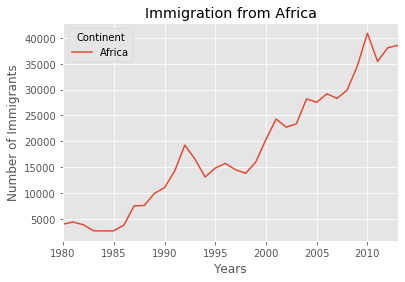

In [20]:
df_sp.plot(kind='line')

plt.title('Immigration from Africa')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show() 

The line plot above clearly shows a rising trend in the number of immigrants from Africa to Canada. A box plot visualizes this trend more descriptively.

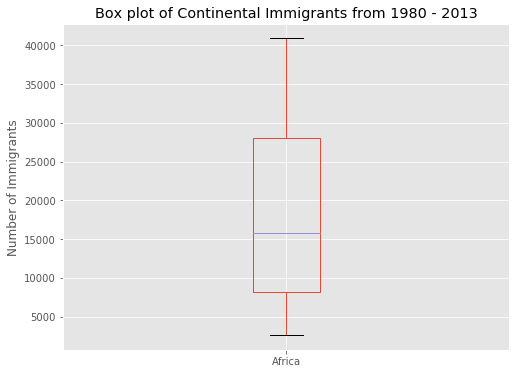

In [21]:
df_sp.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Continental Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can make a few observations from the plot:

1. The minimum number of immigrants from Africa is ~2,500, the maximum is ~41,000 and the median distribution is ~16,000.
2. For 25% of the years 1980-2013, a total of ~8,000 Africans migrated to Canada (First quartile).
3. For 75% of the years 1980-2013, a total of ~27,000 Africans migrated to Canada (Third quartile).

The describe method gives an exact summary.

In [22]:
df_sp.describe()

Continent,Africa
count,34.000000
mean,18204.352941
std,11687.327024
min,2639.000000
25%,8137.500000
50%,15848.000000
75%,28024.750000
max,40892.000000


As you can see from above, the observed values are not far from the exact values.

Now there are some questions that need to be answered. 
1. What majority of Africans migrated during this years?
2. Could there be reasons for the trend of a particular set of Africans migrating? 


In [91]:
#To start with question 1, Let us go back to the original dataframe
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country of Origin,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [92]:
new_df = df.reset_index() #Resetting the index
new_df.head()

,Country of Origin,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [31]:
#dataframe for african countries
africa = new_df.groupby('Continent').get_group('Africa').set_index('Country of Origin').sum(axis = 1).to_frame(name = 'Total')
africa.shape

(54, 1)

The data frame created consists of 54 rows and 1 column. The 54 rows represent the countries and the column represents the total number of immigrants from 1980-2013 for each country row.

In [32]:
africa.head() #First five rows

,Total
Country of Origin,
Algeria,138878
Angola,4226
Benin,5704
Botswana,792
Burkina Faso,4086


In [301]:
#To find the highest number of immigrants 
highest = africa.Total.values.max()
lowest = africa.Total.values.min()

In [302]:
#Casting the Total series to a list to locate the highest and lowest number immigrants 
n = africa.Total.to_list()
high = n.index(highest)
low = n.index(lowest)

In [303]:
print(africa.iloc[high], '\n', africa.iloc[low])

Total    145490
Name: Egypt, dtype: int64 
 Total    4
Name: Western Sahara, dtype: int64


From the above, we can understand that the lowest number of immigrants recorded over 33 years in Canada(according to the united nations of course) was 4 from Western Sahara and 145,490 from Egypt.

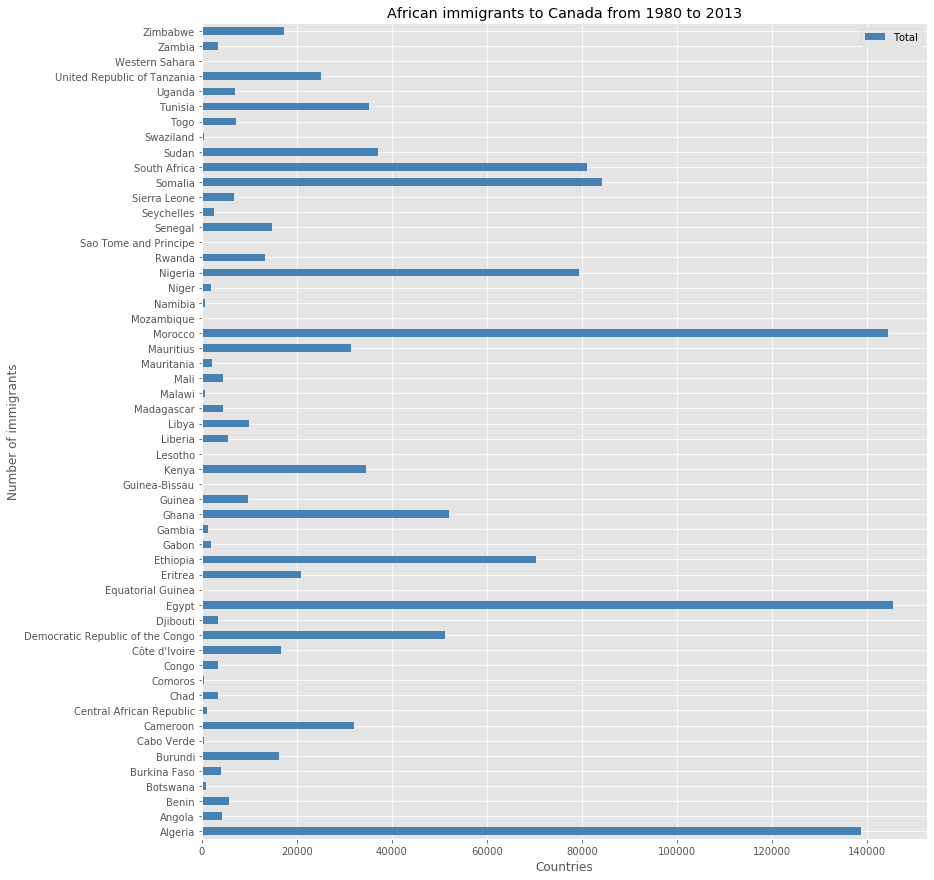

In [33]:
#To visualize this with an bar plot.

africa.plot(kind='barh', figsize=(13, 15), color = 'steelblue')

plt.xlabel('Countries') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('African immigrants to Canada from 1980 to 2013') # add title to the plot


plt.show()

From the above, it is seems like Morocco and Egypt have the highest number of emigrants in Canada (well above 140,000 people) with Algeria not falling too far behind (close to 140,000). For my country Nigeria, this value falls just under 80,000. Now at the beginning i was hoping that Nigeria would have the highest number of total emigrants from 1980-2013, but this new insight makes it all the more fun. So to answer the First question, 

1. **Egypt, Morocco and Algeria have the record of the majority of emigrants to Canada during these years.*** One distinct factor is that they are North African countries. Let's further explore these three countries. Hopefully we can find answers to the next question.

In [34]:
#To explore these three countries
north_africa = df.loc[['Egypt', 'Morocco', 'Algeria'], years]
north_africa

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country of Origin,,,,,,,,,,,,,,,,,,,,,
Egypt,612,660,755,455,447,348,514,1017,1085,1663,...,2393,2496,2190,2356,3347,3496,5982,4663,5555,4165
Morocco,325,471,447,335,248,328,388,505,685,1060,...,3686,2939,3322,4021,4226,5532,6242,4399,3878,3261
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [35]:
#Let's visualise the spread of each country via a line plot, a boxplot and a bar plot
#first we transpose the north_africa dataframe

north_t = north_africa.transpose()
north_t.head()

Country of Origin,Egypt,Morocco,Algeria
1980,612,325,80
1981,660,471,67
1982,755,447,71
1983,455,335,69
1984,447,248,63


Text(0.5, 0, 'Years')

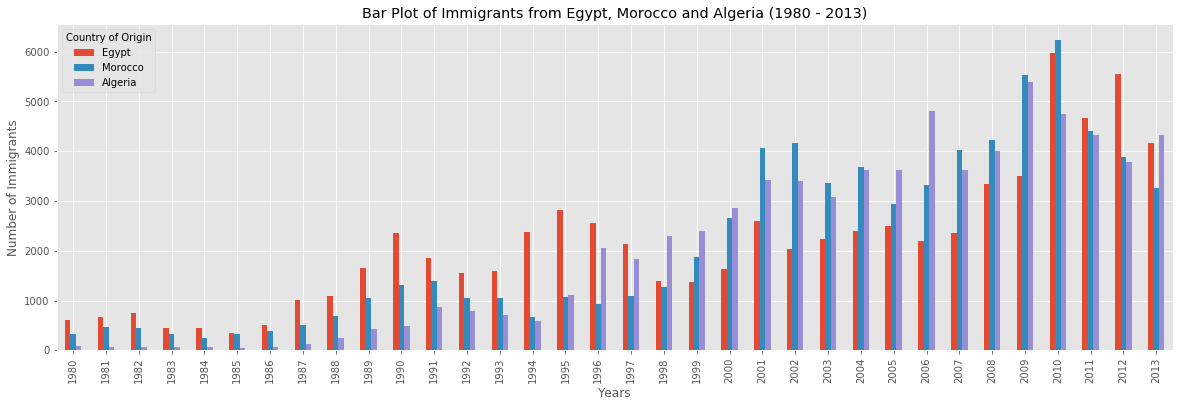

In [37]:
#the bar plot visuals
axx = north_t.plot(kind='bar', figsize=(20, 6), alpha = 1.0, stacked = False, )
axx.set_title ('Bar Plot of Immigrants from Egypt, Morocco and Algeria (1980 - 2013)')
axx.set_ylabel('Number of Immigrants')
axx.set_xlabel('Years')

From the plot above and according to the data provided by the united nations, in the year 2010, Canada recorded the highest number of immigrants from Egypt and Morocco with Algeria recording it's peak the previous year. Could there be a definite cause or reason for this trend?

Well for **Morocco**, i searched the net for relevant news about the country and possible headlines that i could base my inference on and i came across BBC Africa. The summary of what i observed is that between 1998 and 2010, Morocco experienced a series of unstable events that could have possibly triggered migration of her citizens. From the opposition-led government coming into power in 1998, fatal Casablanca bombings in 2003 and 2007, to violent demonstrations in Elayoun in 2010; the potential for migrating might be plausible but not definite. However, more research has to be done to know the exact cause. 

The same goes for Algeria. According to world reports(Human rights watch), between 2006 and 2009, citizens of Algeria experienced several freedom right violations including the violation of freedom of expression, assembly, association and religious practices. Terrorist attacks were also sporadic between December 2007 and September 2008 due to 23 recorded bombings that killed between 291-306 people and injured over 200. 

As for **Egypt(our main foucs)** another visualization method might provide a much more solid analysis on the trend of migrants.



In [53]:
#egypt dataframe
egypt = north_africa.loc[['Egypt']].transpose()
egypt.head()

Country of Origin,Egypt
1980,612
1981,660
1982,755
1983,455
1984,447


In [55]:
egypt.describe() #summary table

Country of Origin,Egypt
count,34.000000
mean,2139.558824
std,1393.809478
min,348.000000
25%,1158.250000
50%,2088.000000
75%,2544.750000
max,5982.000000


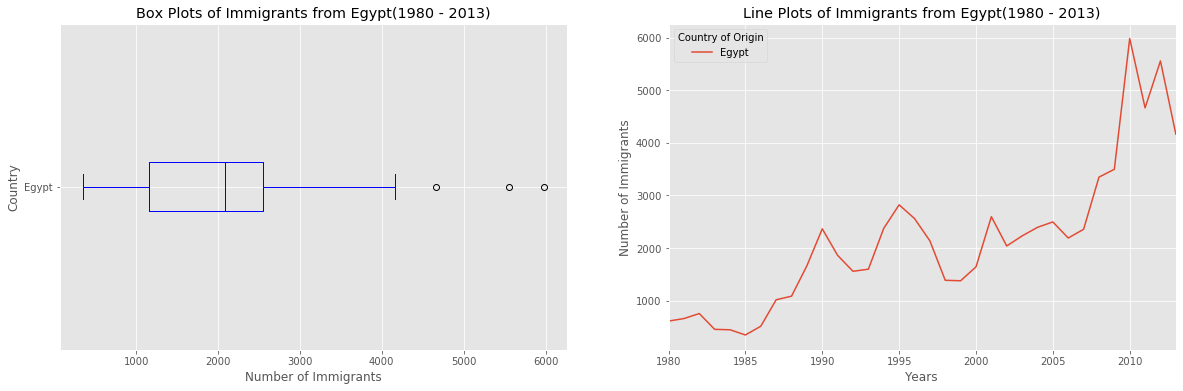

In [54]:
#to create a subplot
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot
egypt.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from Egypt(1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Country')

# Subplot 2: Line plot
egypt.plot(kind='line', figsize=(20, 6), ax=ax1, alpha = 1.0, stacked = False) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from Egypt(1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()


The line plot on the right shows a significant rise in the number of immigrants between 2006 and 2010. Now on researching for possible causes, i stumbled across the world report (Human rights Watch) website for events that had occurred in Egypt. Between 2005 and 2010, Egyptian citizens suffered a series of human rights violations which most likely triggered the massive emigration out of Egypt not only to Canada, but to neighboring countries as well. Some include:

1. **Political Violence and Torture :** On April 6-7, 2008, security forces prevented workers from striking in the city of Mahalla al-Kobra, and violently dispersed protests against rising food costs, wounding more than 100 people and apparently killing a 15-year-old bystander. They arrested hundreds of protestors, journalists, and activists, and detained scores for months without charge or despite court orders for their release.

2. **Violation of freedom of Expression :** The government issued regulations in May requiring internet café users to provide detailed personal information in order to access the web. In April, Cairo security officers arrested Esraa Abd al Fattah and others who used the social-networking website Facebook to call for strikes; and in May security officers in New Cairo stripped and beat Ahmed Maher Ibrahim for the same activity. In July security forces in Alexandria arrested Maher and 13 other members of the "6 April Youth" group and jailed them for two weeks without charge after they sang patriotic songs and refused to disperse when ordered.

3. **Violation of freedom of Association :** In an April 2008 hearing closed to defense lawyers and the public, a military tribunal sentenced Muslim Brotherhood Deputy Supreme Guide Khairat al-Shatir and 24 other civilians, seven of them in absentia, to prison terms of up to 10 years and ordered the seizure of millions of dollars in assets. A regular criminal court had acquitted 17 of the defendants in January 2007 but the next month President Mubarak transferred their cases, along with 23 others, to the military tribunal. In March 2008, prior to local and municipal council elections, security forces arrested and detained without charge more than 800 Muslim Brotherhood members, including at least 148 would-be independent candidates.

4. **Violation of Women's and Children's Rights :** A 2008 survey by the Egyptian Center for Women's Rights found that 83 percent of Egyptian women have experienced sexual harassment in their lifetime. In October a mob of men and boys sexually assaulted women in Cairo while they were celebrating the Eid holiday marking the end of Ramadan. Eight men are reported to have been arrested and face prosecution. These attacks mark a repeat of similar violence two years earlier when police officers were videotaped doing nothing to stop the mob attacks.

More of these events can be found on their website: https://www.hrw.org/world-report/2009/country-chapters/egypt



**Note from the subplot above how the box plot on the left differs from the summary table created above it**. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:

larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
smaller than Q1 by at least 1.5 times the IQR.

Now Q1 = first quartile = 1,158.25
Q3 = third quartile = 2,544.75

By the definition of an outlier, any value greater than Q3  by at least 1.5 times the interquartile range(IQR):

IQR = 1.5*(2544.75 - 1158.25) = 2079.75 

Therefore Outlier > 2544.75 + 2079.75

Outlier > 4,624.5

In [85]:
#To check how many entries fall above the outlier threshold:
egypt[egypt > 4624.5]

Country of Origin,Egypt
years,
1980,NaN
1981,NaN
1982,NaN
1983,NaN
1984,NaN
1985,NaN
1986,NaN
1987,NaN
1988,NaN


Three years fall in as outliers. 2010(5982 immigrants), 2011(4663 immigrants), 2012(5555 immigrants) because they exceeded the outlier threshold. These figures make a lot of sense when you think about the Egyptian revolution in 2011.

Now having explored Egypt, Algeria and Morocco, for the sake of patriotism, let's explore Nigeria's entries.

In [88]:
#from the africa dataframe
africa.index

Index(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo', 'Côte d'Ivoire', 'Democratic Republic of the Congo',
       'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles',
       'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Western Sahara',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Country of Origin')

In [89]:
#For Nigeria
africa.loc['Nigeria']

Total    79464
Name: Nigeria, dtype: int64

In [93]:
#A total of 79464 nigerians migrated to canada between 1980 and 2013
#let's check the data frame new_df 
new_df.head()

,Country of Origin,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [94]:
naija = df.loc[['Nigeria'], years]
naija

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country of Origin,,,,,,,,,,,,,,,,,,,,,
Nigeria,81,60,58,58,78,78,114,149,122,195,...,1518,2236,2594,2375,2109,3156,3906,3103,3443,4172


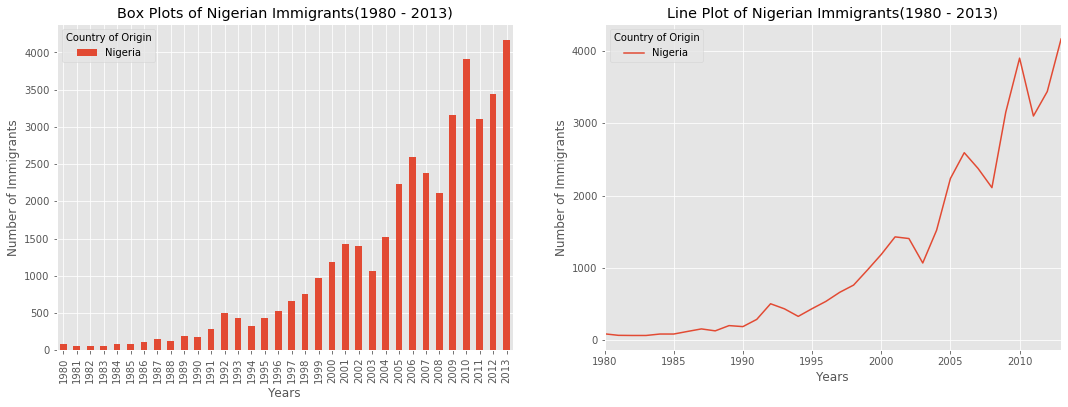

In [157]:
naija_1 = naija.transpose() #Transposing the data frame

fig = plt.figure() # create figure

a = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
a1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Bar plot
naija_1.plot(kind='bar', figsize=(18, 6), ax=a) # add to subplot 1
a.set_title('Box Plots of Nigerian Immigrants(1980 - 2013)')
a.set_xlabel('Years')
a.set_ylabel('Number of Immigrants')

# Subplot 2: Line plot
naija_1.plot(kind='line', figsize=(18, 6), ax=a1) # add to subplot 2
a1.set_title ('Line Plot of Nigerian Immigrants(1980 - 2013)')
a1.set_ylabel('Number of Immigrants')
a1.set_xlabel('Years')


plt.show()

The above visual describes one major thing; which is the fact that the number of immigrants from Nigeria residing in  Canada seem to have been on the up trend in general. This trend in some years seemed quite drastic e.g (2003 - 2006), (2008 - 2010). It's hard to really say what could have caused these acute peak trends, but as a Nigerian, it's plausible for me to blame the poor governance and political system that has dominated the nation for so many years, hence resulting in the the emigration of citizens in general.

The boxplot below visualizes the spread of the migrants.

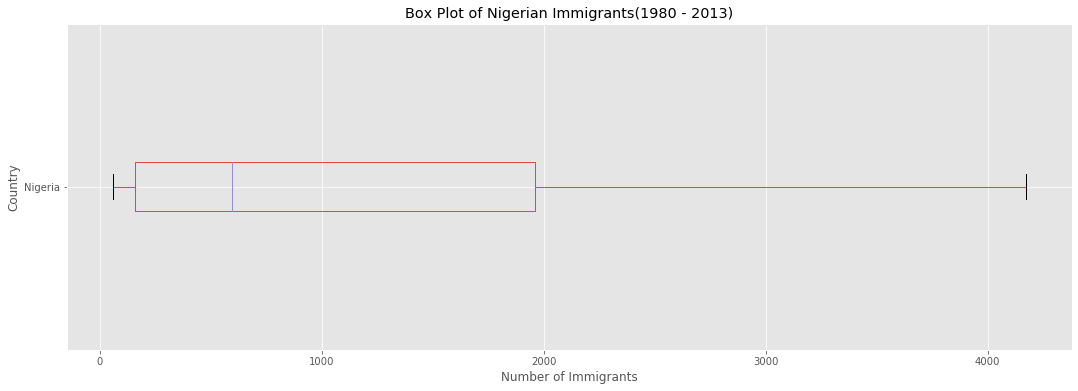

In [160]:
naija_1.plot(kind='box', vert = False, figsize=(18, 6))
plt.title('Box Plot of Nigerian Immigrants(1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.ylabel('Country')
plt.show()

In [161]:
#To accurately describe the plot with the table
naija_1.describe()

Country of Origin,Nigeria
count,34.000000
mean,1168.588235
std,1249.203992
min,58.000000
25%,157.000000
50%,594.000000
75%,1961.250000
max,4172.000000


From above, note that:
1. Count represents the number of entries(1980 - 2013) which is equal to 34.
2. The mean number of Nigerian immigrants were  ~1170.
3. The standard deviation from the mean was ~1249.
4. The minimum number of Nigerian migrants reported were 58 in number.
5. 25% of the years 1980-2013 (first quartile) had an annual immigrant count of 157 Nigerians.
6. The median count of annual Nigerian immigrants in Canada turned out to  be 594.
7. 75% of the years (third quartile) had an annual immigrant count of approximately 1,961 Nigerians.
8. The maximum number of Nigerian immigrants reported were 4,172 in number.

The END!

This notebook was prepared by Ifeakor Nnaemeka Praise. A data science and Machine learning enthusiast.